# Calculate LSV with (ultra)microdisc electrodes

The class softpotato.Disc.LSV() uses the equation reported by Oldham and Zoski:

Keith B.Oldham and Cynthia G.Zoski. *Comparison of voltammetric steady states at hemispherical and disc microelectrodes*, Journal of Electroanalytical Chemistry and Interfacial Electrochemistry, Volume 256, Issue 1, 25 November 1988, Pages 11-19. DOI: https://doi.org/10.1016/0022-0728(88)85002-2

It assumes an ultramicrodisc electrode with hemispherical diffusion and a reduction reaction.

In [1]:
from softpotato import *
import softpotato as sp

### Define parameters:

In [4]:
a = 12.5e-4 # cm, electrode radius
DO = 1e-5 # cm2/s, diffusion coefficient of O
DR = 1e-5 # cm2/s, diffusion coefficient of R
CO = 1e-6 # mol/cm3, concentration of O
k0 = 5e-1 # cm/s, standard rate constant
alpha = 0.5 # transfer coefficient
E0 = 0 # V, standard potential

Eini = -0.2 # V, LSV initial potential
Efin = 0.2 # V, LSV final potential
sr = 0.001 # V, scan rate
dE = 0.001 # V, potential increment
ns = 1 # number of sweeps

### Generate LSV potential waveform:
Each potential waveform in softpotato.tech will calculate a *t* and *E* method that can be accessed from the object.

In [3]:
wf = sp.tech.Sweep(Eini=Eini, Efin=Efin, sr=sr, dE=dE, ns=ns)
t = wf.t
E = wf.E

### Calculate disc LSV:

MicroDisc() accepts the parameters defined previously, however, they all have default values an if those are used they can be ignored, here, it is assumed that the values fo *a*, *k0*, *alpha* and *E0* are different than the default ones as an example. 

The method LSV() requires the *E* array created with waveform (or passed as a list) and it will calculate the corresponding current.

The method iLim() calculates the limiting current for that microelectrode with the parameters passed during the object creation.

In [5]:
disc = sp.calc.MicroDisc(a=a, k0=k0, alpha=alpha, E0=E0, DO=DO, DR=DR, CO=CO)
i = disc.LSV(E)
iLim = disc.iLim
print('iLim = {:.2f} nA'.format(iLim*1e9))

iLim = 4.82 nA


### Plot the LSV:

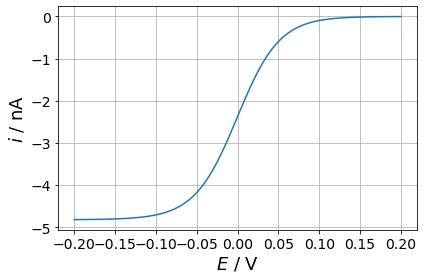

In [6]:
sp.plot.plot(E, i*1e9, xlab='$E$ / V', ylab='$i$ / nA')

### Iterate over any parameter:

Let us say that we want to see the voltammogram obtained with different radii, this is easily done by iterating over *a*.

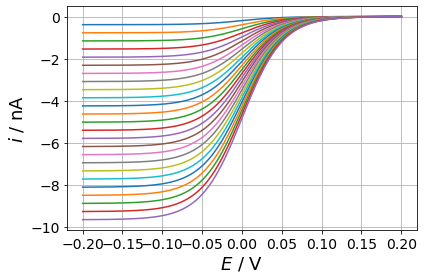

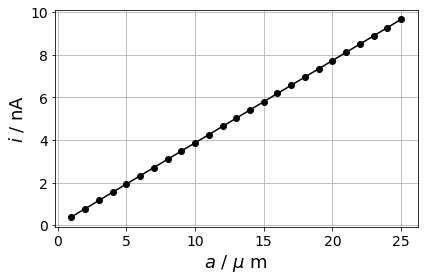

In [7]:
import numpy as np # To make our life easier

# Creates an array of 25 values of a every 1 um:
a = np.linspace(1,25,25)*1e-4

# We need the number of items in E and a:
nE = np.size(E)
na = np.size(a)

# Initialize variables to store values:
i = np.zeros([nE, na])
iLim = np.zeros(na)

# Iterate to calculate i
for x in range(na):
    disc = sp.calc.MicroDisc(a=a[x], k0=1e0)
    i[:,x] = disc.LSV(E)
    iLim[x] = disc.iLim

# Plotting:
#sp.plot.plot(E, i*1e9, xlab='$E$ / V', ylab='$i$ / nA', fig=2)
sp.plot.plot(E, i/iLim, xlab='$E$ / V', ylab='$i$ / $i_{lim}$', fig=2)
sp.plot.plot(a*1e4, iLim*1e9, xlab=r'$a$ / $\mu$ m', ylab='$i$ / nA', mark='k-o', fig=3)

What about iterating over k0? Well, is the same, really.

k0 [cm/s] = 
[0.001      0.00215443 0.00464159 0.01       0.02154435 0.04641589
 0.1        0.21544347 0.46415888 1.        ]


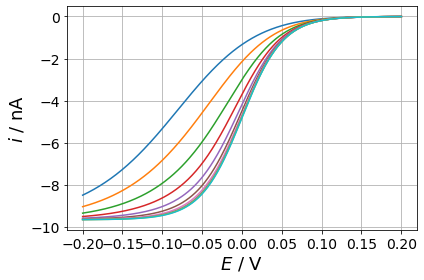

In [8]:
a = 25*1e-4 # Reassign a

# Create logaritmically spaced array
k0 = np.logspace(-3,0,10)
print('k0 [cm/s] = ')
print(k0)

# We need the number of items in E and a:
nE = np.size(E)
nk = np.size(k0)

# Initialize variables to store values:
i = np.zeros([nE, nk])

# Iterate to calculate i
for x in range(nk):
    disc = sp.calc.MicroDisc(a=a, k0=k0[x])
    i[:,x] = disc.LSV(E)

# Plotting:
sp.plot.plot(E, i*1e9, xlab='$E$ / V', ylab='$i$ / nA', fig=4)